In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm 


In [3]:
data = pd.read_csv('CSV/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print(data.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [5]:
# print rows where label is DDos
print(data.loc[data[' Label'] == 'DDoS'])

         Destination Port   Flow Duration   Total Fwd Packets  \
18883                  80         1293792                   3   
18884                  80         4421382                   4   
18885                  80         1083538                   3   
18886                  80        80034360                   8   
18887                  80          642654                   3   
...                   ...             ...                 ...   
197538                 80          163071                   4   
197539                 80            2036                   3   
197540                 80          159465                   4   
197541                 80            1453                   3   
197542                 80          155039                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
18883                         7                           26   
18884                         0                           24   
18885                      

In [22]:
features_namesMain = data.columns.tolist()
print(features_namesMain)


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [23]:
features_names = data.columns.tolist()[:-1]
print(features_names)


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [30]:
X_data = data[features_names]
y_data = data[' Label']
target_names = ['BENIGN', 'DDoS','PortScan', 'Bot', 'Infiltration', 'Web Attack', 'Brute Force', 'SQL Injection']
print(X_data)


         Destination Port   Flow Duration   Total Fwd Packets  \
0                   54865               3                   2   
1                   55054             109                   1   
2                   55055              52                   1   
3                   46236              34                   1   
4                   54863               3                   2   
...                   ...             ...                 ...   
225740              61374              61                   1   
225741              61378              72                   1   
225742              61375              75                   1   
225743              61323              48                   2   
225744              61326              68                   1   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             1                            6   
2                          

In [31]:
import numpy as np

# replace positive and negative infinity with NaN
X_data = X_data.replace([np.inf, -np.inf], np.nan)

X_data = np.log1p(X_data)
# check if data still has any NaN
if X_data.isnull().any().any():
    print("Data contains NaN values.")
    # proceed according to your problem context
    # filling NaNs with mean of the column as an example
    X_data = X_data.fillna(X_data.mean())


C:\Users\Khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\Khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


Data contains NaN values.


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_scaled[5:15]

ValueError: Input X contains infinity or a value too large for dtype('float64').

C:\Users\Khali\AppData\Local\Temp\ipykernel_35532\33631835.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name:  Label, Length: 225745, dtype: object

Error in callback <function _draw_all_if_interactive at 0x00000238DFBF2160> (for post_execute):


KeyboardInterrupt: 

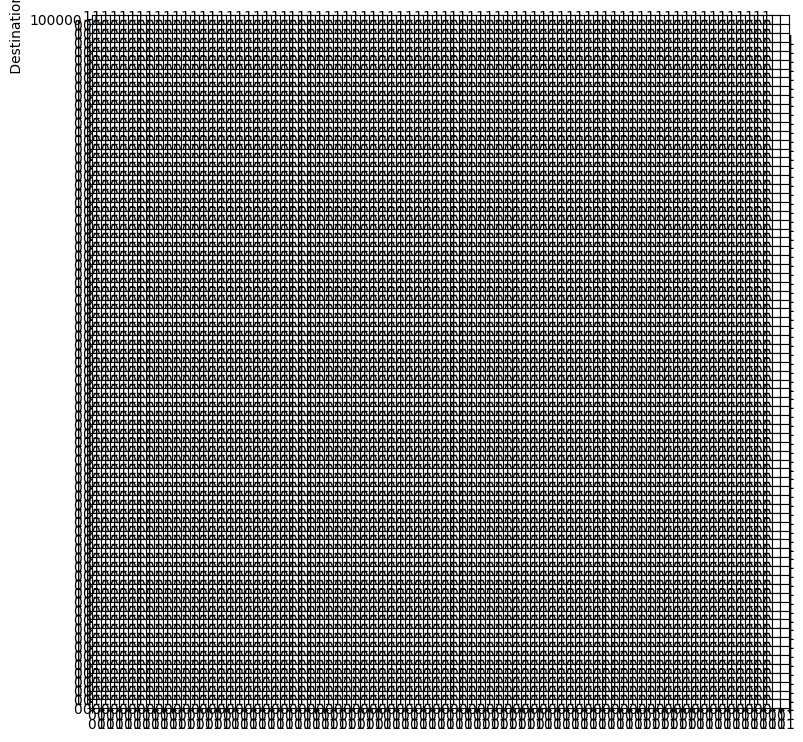

In [32]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_data, c= y_data, marker = 'o', hist_kwds={'bins':15}, figsize=(9,9),cmap = cmap)